<a href="https://colab.research.google.com/github/etietopabraham/CareerChief.ai/blob/master/Stage_1_CareerChief_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STAGE 1 - DATA UPLOAD, PREPROCESSING, EXPLORATIVE ANALYSIS

# **Introduction**

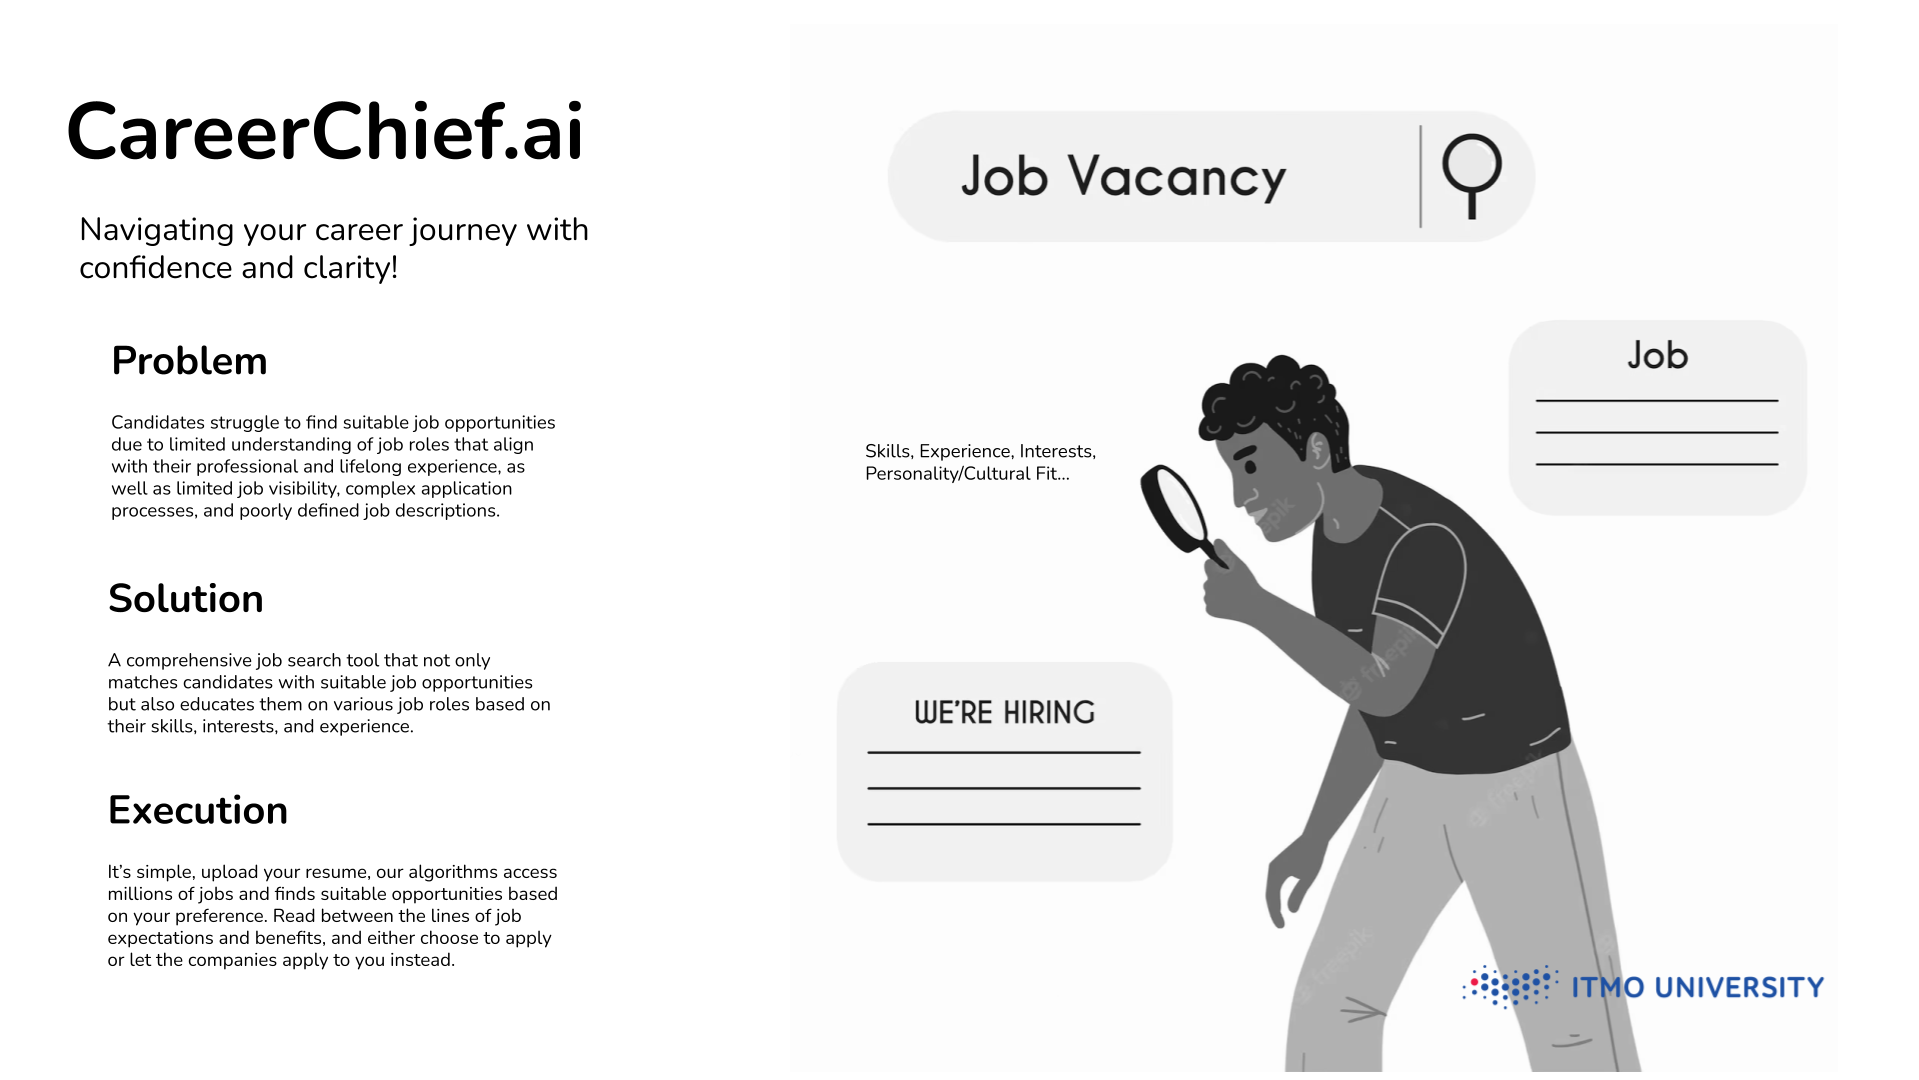

# Imports

In [1]:
import pandas as pd

# Helper Functions

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_column_distribution(df, column, n_values=None):
    """
    Plots a horizontal bar chart for the specified DataFrame column.

    Parameters:
    df (pd.DataFrame): The input DataFrame
    column (str): The name of the column to plot
    n_values (int, optional): The number of values to display in the plot. Default is None (display all values).

    Returns:
    None
    """
    # Set the style and font
    sns.set_style('whitegrid')
    sns.set(font_scale=1.2)

    # Create the horizontal bar chart
    value_counts = df[column].value_counts()

    if n_values is not None:
        value_counts = value_counts.head(n_values)

    plt.figure(figsize=(14, 10))
    ax = sns.barplot(y=value_counts.index, x=value_counts, orient='h', palette='viridis')

    # Add count labels to the bars
    for i, v in enumerate(value_counts):
        ax.text(v, i, str(v), color='black', fontsize=12, ha='left', va='center')

    # Set labels and title
    plt.xlabel('Count', fontsize=14)
    plt.ylabel(column.capitalize(), fontsize=14)
    plt.title(f'{column.capitalize()} Distribution', fontsize=16)

    # Show the graph
    plt.show()

# Load Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path_1 = "/content/drive/MyDrive/Data Scientist/Projects/CareerChief.ai/Data/jobs_res_1.csv"
file_path_2 = "/content/drive/MyDrive/Data Scientist/Projects/CareerChief.ai/Data/jobs_res_2.csv"
jobs_batch_1 = pd.read_csv(file_path_1)
jobs_batch_2 = pd.read_csv(file_path_2)
raw_data = pd.concat([jobs_batch_1, jobs_batch_2], ignore_index=True)

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21720 entries, 0 to 21719
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   №            21720 non-null  int64 
 1   id           21720 non-null  object
 2   title        21691 non-null  object
 3   salary       21702 non-null  object
 4   experience   21702 non-null  object
 5   job_type     21702 non-null  object
 6   description  20932 non-null  object
 7   key_skills   16686 non-null  object
 8   company      21648 non-null  object
 9   location     10276 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.7+ MB


In [6]:
raw_data.head(5)

,№,id,title,salary,experience,job_type,description,key_skills,company,location
0,1,79114023,Prompt Engineer/Analyst,з/п не указана,1–3 года,"Полная занятость,полный день",Future is coming… Are you ready to be at the f...,"MS Excel,Английский — C1 — Продвинутый",Вебби Технолоджис,"Минск, Академия наук, Парк Челюскинцев, Тракто..."
1,2,79218886,Technical Lead Full Stack JavaScript Developer...,з/п не указана,более 6 лет,"Полная занятость,полный день",SaM Solutions is an international IT-services ...,Английский — B2 — Средне-продвинутый,SaM Solutions Самсолюшнс,NaN
2,3,78986605,Junior QA engineer (manual),от 2 000 до 2 200 USD до вычета налогов,не требуется,"Полная занятость,полный день",Lightspeed develops unified POS-systems which ...,"Git,HTML,SQL,CSS,Английский язык,Time manageme...",Lightspeed,"Тбилиси, улица Жиули Шартава, 33"
3,4,79060193,Senior QA Engineer (Remote),от 4 000 до 6 000 USD на руки,более 6 лет,"Полная занятость,полный день",The problem we're solving: Truv empowers finan...,"SQL,Scrum,Английский язык,QA,Selenium IDE,Python",Truv Inc.,NaN
4,5,78986544,Junior QA engineer (manual),от 2 000 до 2 200 USD до вычета налогов,1–3 года,"Полная занятость,полный день",Lightspeed develops unified POS-systems which ...,"Git,HTML,SQL,CSS,Английский язык,Time manageme...",Lightspeed,NaN


# Features Selection

In [7]:
# List the columns you we want to keep
columns_to_keep = ['title', 'salary', 'experience', 'job_type', 'description', 'key_skills', 'location', 'company']

# Create a new DataFrame with only the columns we want to keep
features_selected_df = raw_data[columns_to_keep].copy()

# Lowercase

In [8]:
def convert_column_to_lowercase(df, column_name):
    df.loc[:, column_name] = df[column_name].str.lower()
    return df

In [9]:
features_selected_df = convert_column_to_lowercase(features_selected_df, 'title')
features_selected_df = convert_column_to_lowercase(features_selected_df, 'salary')
features_selected_df = convert_column_to_lowercase(features_selected_df, 'experience')
features_selected_df = convert_column_to_lowercase(features_selected_df, 'job_type')
features_selected_df = convert_column_to_lowercase(features_selected_df, 'description')
features_selected_df = convert_column_to_lowercase(features_selected_df, 'key_skills')
features_selected_df = convert_column_to_lowercase(features_selected_df, 'company')
features_selected_df = convert_column_to_lowercase(features_selected_df, 'location')

In [10]:
features_selected_df

,title,salary,experience,job_type,description,key_skills,location,company
0,prompt engineer/analyst,з/п не указана,1–3 года,"полная занятость,полный день",future is coming… are you ready to be at the f...,"ms excel,английский — c1 — продвинутый","минск, академия наук, парк челюскинцев, тракто...",вебби технолоджис
1,technical lead full stack javascript developer...,з/п не указана,более 6 лет,"полная занятость,полный день",sam solutions is an international it-services ...,английский — b2 — средне-продвинутый,NaN,sam solutions самсолюшнс
2,junior qa engineer (manual),от 2 000 до 2 200 usd до вычета налогов,не требуется,"полная занятость,полный день",lightspeed develops unified pos-systems which ...,"git,html,sql,css,английский язык,time manageme...","тбилиси, улица жиули шартава, 33",lightspeed
3,senior qa engineer (remote),от 4 000 до 6 000 usd на руки,более 6 лет,"полная занятость,полный день",the problem we're solving: truv empowers finan...,"sql,scrum,английский язык,qa,selenium ide,python",NaN,truv inc.
4,junior qa engineer (manual),от 2 000 до 2 200 usd до вычета налогов,1–3 года,"полная занятость,полный день",lightspeed develops unified pos-systems which ...,"git,html,sql,css,английский язык,time manageme...",NaN,lightspeed
...,...,...,...,...,...,...,...,...
21715,сервисный инженер лазерных станков с чпу,от 100 000 до 300 000 руб. на руки,1–3 года,"полная занятость,полный день","обязанности: • запуск, сервис и проведение пус...","наладчик чпу,сервисный инженер,пуско-наладочны...","москва, кунцевская, кунцевская, верейская улиц...",кварта групп
21716,эксперт по внутренним коммуникациям,з/п не указана,1–3 года,"полная занятость,полный день",обязанности: донесение до всех сотрудников осн...,"проведение опросов,написание статей,написание ...","барнаул, улица малахова, 88в","пао втб, региональная сеть и контакт-центр"
21717,"медицинский представитель, rx",з/п не указана,1–3 года,"полная занятость,полный день",команда эффективных профессионалов ждет успешн...,"навыки продаж,водительское удостоверение катег...",NaN,акрихин
21718,data scientist,з/п не указана,3–6 лет,"полная занятость,полный день",наша команда занимается построением ml моделей...,NaN,NaN,сбер. it


# Job Title

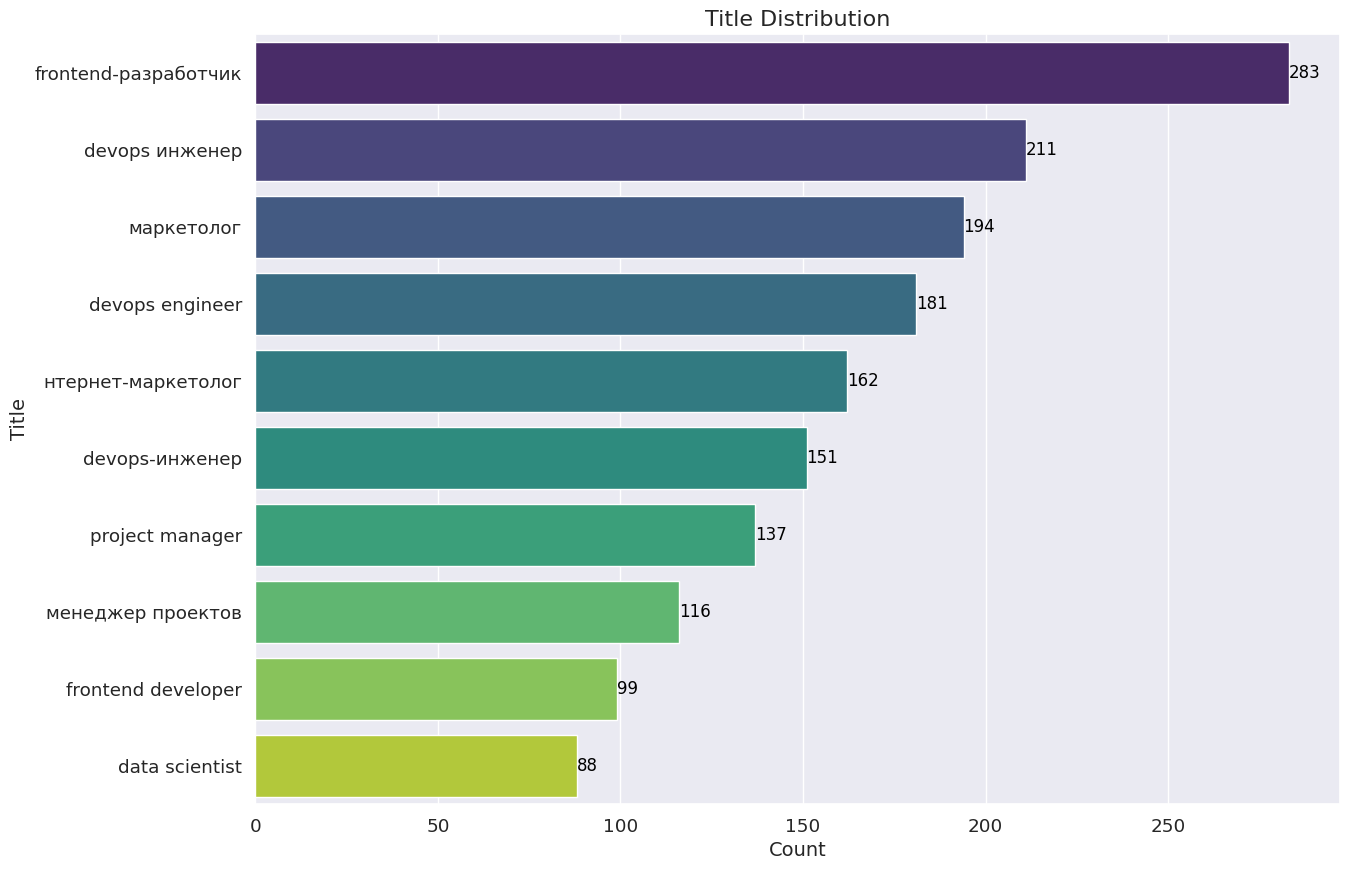

In [11]:
# Job type distribution
plot_column_distribution(features_selected_df, 'title', n_values=10)

# Salary - min_max_salary_features_selected_df

There's a major issue, I noticed that this salary field, also contains values in different currencies.

E.g. 

*   от 2 000 до 2 200 USD до вычета налогов - is in USD
*   до 7 000 EUR на руки - is in EUR
*   от 200 000 до 300 000 руб. до вычета налогов - is in Russian rubles
*   от 350 000 до 400 000 KZT до вычета налогов - is in Kazakhstani Tenge
*  от 50 000 до 65 000 руб. на руки - is in Russian Rubles


I recommend updating the function to convert the salary values to a single currency (USD) before returning the min and max values. We can use an external API like exchangeratesapi.io to get the latest conversion rates.

In [12]:
!pip install CurrencyConverter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 569.4/569.4 kB 15.3 MB/s eta 0:00:00


In [13]:
from currency_converter import CurrencyConverter
import re

currency_converter = CurrencyConverter()

def extract_min_max_salary(salary_text):
    if not isinstance(salary_text, str):
        return (None, None)

    salary_text = salary_text.lower()
    if "з/п не указана" in salary_text:
        return (None, None)

    min_salary = None
    max_salary = None

    # Extract minimum salary
    min_salary_match = re.search(r'от\s?(\d[\d\s]*\d)', salary_text)
    if min_salary_match:
        min_salary = int(min_salary_match.group(1).replace(" ", ""))

    # Extract maximum salary
    max_salary_match = re.search(r'до\s?(\d[\d\s]*\d)', salary_text)
    if max_salary_match:
        max_salary = int(max_salary_match.group(1).replace(" ", ""))

    # Extract currency
    currency_match = re.search(r'(usd|eur|руб|kzt)', salary_text)
    currency = currency_match.group(1).upper() if currency_match else None

    # Replace non-standard currency codes
    if currency == 'РУБ':
        currency = 'RUB'

    # Convert min_salary and max_salary to USD
    if min_salary is not None and currency is not None:
        try:
            min_salary = currency_converter.convert(min_salary, currency, 'USD')
        except ValueError:
            min_salary = None

    if max_salary is not None and currency is not None:
        try:
            max_salary = currency_converter.convert(max_salary, currency, 'USD')
        except ValueError:
            max_salary = None

    return (min_salary, max_salary)


In [14]:
salary_features_selected_df = features_selected_df.copy()

In [15]:
# Apply the extract_min_max_salary function to the salary column
salary_data = salary_features_selected_df['salary'].apply(extract_min_max_salary)

# Create new columns for minimum and maximum salaries
salary_features_selected_df['min_salary_usd'] = salary_data.apply(lambda x: x[0])
salary_features_selected_df['max_salary_usd'] = salary_data.apply(lambda x: x[1])

In [16]:
salary_features_selected_df.head(15)

,title,salary,experience,job_type,description,key_skills,location,company,min_salary_usd,max_salary_usd
0,prompt engineer/analyst,з/п не указана,1–3 года,"полная занятость,полный день",future is coming… are you ready to be at the f...,"ms excel,английский — c1 — продвинутый","минск, академия наук, парк челюскинцев, тракто...",вебби технолоджис,NaN,NaN
1,technical lead full stack javascript developer...,з/п не указана,более 6 лет,"полная занятость,полный день",sam solutions is an international it-services ...,английский — b2 — средне-продвинутый,NaN,sam solutions самсолюшнс,NaN,NaN
2,junior qa engineer (manual),от 2 000 до 2 200 usd до вычета налогов,не требуется,"полная занятость,полный день",lightspeed develops unified pos-systems which ...,"git,html,sql,css,английский язык,time manageme...","тбилиси, улица жиули шартава, 33",lightspeed,2000.000000,2200.000000
3,senior qa engineer (remote),от 4 000 до 6 000 usd на руки,более 6 лет,"полная занятость,полный день",the problem we're solving: truv empowers finan...,"sql,scrum,английский язык,qa,selenium ide,python",NaN,truv inc.,4000.000000,6000.000000
4,junior qa engineer (manual),от 2 000 до 2 200 usd до вычета налогов,1–3 года,"полная занятость,полный день",lightspeed develops unified pos-systems which ...,"git,html,sql,css,английский язык,time manageme...",NaN,lightspeed,2000.000000,2200.000000
5,cloud engineer (devops or site reliability eng...,от 5 000 до 8 000 usd до вычета налогов,более 6 лет,"полная занятость,полный день",full job description we are looking for a tale...,NaN,NaN,хлебушкин николай валерьевич,5000.000000,8000.000000
6,software engineer / senior python developer,до 7 000 eur на руки,более 6 лет,"полная занятость,полный день",position: senior python developer location: re...,"python,asyncio,aiohttp,fast api,sanic,tornado,...",NaN,сигматрикс,NaN,7686.700000
7,devops release engineer,от 3 500 до 4 500 usd на руки,1–3 года,"полная занятость,полный день",сегодня на рынке мы одини из ведущих экспертов...,"linux,mac os,aws,azure,gsp,didgital ocean,agil...",NaN,райдер софт,3500.000000,4500.000000
8,senior qa engineer (remote),от 4 000 до 6 000 usd на руки,более 6 лет,"полная занятость,полный день",the problem we're solving: truv empowers finan...,"sql,scrum,английский язык,qa,selenium ide,python",NaN,truv inc.,4000.000000,6000.000000
9,team lead / senior software engineer (python),от 300 000 руб. на руки,более 6 лет,"полная занятость,удаленная работа",привет! smmplanner занимается разработкой и п...,"python,postgresql,docker,redis,rabbitmq,sql,ku...",NaN,smmplanner,2857.142857,NaN


In [17]:
min_max_salary_features_selected_df = salary_features_selected_df.drop('salary', axis=1)

In [18]:
min_max_salary_features_selected_df.head(5)

,title,experience,job_type,description,key_skills,location,company,min_salary_usd,max_salary_usd
0,prompt engineer/analyst,1–3 года,"полная занятость,полный день",future is coming… are you ready to be at the f...,"ms excel,английский — c1 — продвинутый","минск, академия наук, парк челюскинцев, тракто...",вебби технолоджис,NaN,NaN
1,technical lead full stack javascript developer...,более 6 лет,"полная занятость,полный день",sam solutions is an international it-services ...,английский — b2 — средне-продвинутый,NaN,sam solutions самсолюшнс,NaN,NaN
2,junior qa engineer (manual),не требуется,"полная занятость,полный день",lightspeed develops unified pos-systems which ...,"git,html,sql,css,английский язык,time manageme...","тбилиси, улица жиули шартава, 33",lightspeed,2000.0,2200.0
3,senior qa engineer (remote),более 6 лет,"полная занятость,полный день",the problem we're solving: truv empowers finan...,"sql,scrum,английский язык,qa,selenium ide,python",NaN,truv inc.,4000.0,6000.0
4,junior qa engineer (manual),1–3 года,"полная занятость,полный день",lightspeed develops unified pos-systems which ...,"git,html,sql,css,английский язык,time manageme...",NaN,lightspeed,2000.0,2200.0


# Experience - Final datasframe will be in experience_min_max_salary_features_selected_df

Extracting the minimum and maximum experience from the experience variable

In [19]:
def extract_min_max_experience(exp_string):
    if not isinstance(exp_string, str):
        return None, None
    
    # Match the range pattern (e.g. "1–3 года" or "3–6 лет")
    match = re.search(r'(\d+)\s*[–-]\s*(\d+)', exp_string)
    if match:
        min_exp = int(match.group(1))
        max_exp = int(match.group(2))
    else:
        # Match "более X лет" pattern
        match = re.search(r'более\s*(\d+)', exp_string)
        if match:
            min_exp = int(match.group(1))
            max_exp = None
        # Match "не требуется" pattern
        elif 'не требуется' in exp_string:
            min_exp = max_exp = 0
        else:
            # If none of the patterns are found, set both min_exp and max_exp to None
            min_exp = max_exp = None

    return min_exp, max_exp

In [20]:
#Copy dataframe from min max salary df
experience_min_max_salary_features_selected_df = min_max_salary_features_selected_df.copy()

# Extract minimum and maximum experience from the 'experience' field and create new columns for them
experience_min_max_salary_features_selected_df['min_experience'], experience_min_max_salary_features_selected_df['max_experience'] = zip(*experience_min_max_salary_features_selected_df['experience'].apply(extract_min_max_experience))

# Drop the original 'experience' field, as we've extracted the relevant information
experience_min_max_salary_features_selected_df.drop('experience', axis=1, inplace=True)

In [21]:
experience_min_max_salary_features_selected_df.head(10)

,title,job_type,description,key_skills,location,company,min_salary_usd,max_salary_usd,min_experience,max_experience
0,prompt engineer/analyst,"полная занятость,полный день",future is coming… are you ready to be at the f...,"ms excel,английский — c1 — продвинутый","минск, академия наук, парк челюскинцев, тракто...",вебби технолоджис,NaN,NaN,1.0,3.0
1,technical lead full stack javascript developer...,"полная занятость,полный день",sam solutions is an international it-services ...,английский — b2 — средне-продвинутый,NaN,sam solutions самсолюшнс,NaN,NaN,6.0,NaN
2,junior qa engineer (manual),"полная занятость,полный день",lightspeed develops unified pos-systems which ...,"git,html,sql,css,английский язык,time manageme...","тбилиси, улица жиули шартава, 33",lightspeed,2000.000000,2200.0,0.0,0.0
3,senior qa engineer (remote),"полная занятость,полный день",the problem we're solving: truv empowers finan...,"sql,scrum,английский язык,qa,selenium ide,python",NaN,truv inc.,4000.000000,6000.0,6.0,NaN
4,junior qa engineer (manual),"полная занятость,полный день",lightspeed develops unified pos-systems which ...,"git,html,sql,css,английский язык,time manageme...",NaN,lightspeed,2000.000000,2200.0,1.0,3.0
5,cloud engineer (devops or site reliability eng...,"полная занятость,полный день",full job description we are looking for a tale...,NaN,NaN,хлебушкин николай валерьевич,5000.000000,8000.0,6.0,NaN
6,software engineer / senior python developer,"полная занятость,полный день",position: senior python developer location: re...,"python,asyncio,aiohttp,fast api,sanic,tornado,...",NaN,сигматрикс,NaN,7686.7,6.0,NaN
7,devops release engineer,"полная занятость,полный день",сегодня на рынке мы одини из ведущих экспертов...,"linux,mac os,aws,azure,gsp,didgital ocean,agil...",NaN,райдер софт,3500.000000,4500.0,1.0,3.0
8,senior qa engineer (remote),"полная занятость,полный день",the problem we're solving: truv empowers finan...,"sql,scrum,английский язык,qa,selenium ide,python",NaN,truv inc.,4000.000000,6000.0,6.0,NaN
9,team lead / senior software engineer (python),"полная занятость,удаленная работа",привет! smmplanner занимается разработкой и п...,"python,postgresql,docker,redis,rabbitmq,sql,ku...",NaN,smmplanner,2857.142857,NaN,6.0,NaN


# Job Type Convert to English - job_type_experience_min_max_salary_features_selected_df

In [22]:
def replace_job_type_with_english(df, column_name):
    translation_dict = {
        'полная занятость,полный день': 'full time',
        'полная занятость,удаленная работа': 'full time, remote work',
        'полная занятость,гибкий график': 'full time, flexible schedule',
        'частичная занятость,удаленная работа': 'part time, remote work',
        'стажировка,полный день': 'internship full time',
        'частичная занятость,полный день': 'part time, full time',
        'проектная работа/разовое задание,удаленная работа': 'project work / one-time task, remote work',
        'полная занятость,сменный график': 'full time, shift schedule',
        'проектная работа/разовое задание,полный день': 'project work / one-time task, full day',
        'полная занятость,вахтовый метод': 'full time, shift work',
        'частичная занятость,гибкий график': 'part time, flexible schedule',
        'стажировка,гибкий график': 'internship, flexible schedule',
        'стажировка,удаленная работа': 'internship, remote work',
        'проектная работа/разовое задание,гибкий график': 'project work / one-time assignment, flexible schedule',
        'частичная занятость,сменный график': 'part time, shift schedule',
        'стажировка,вахтовый метод': 'internship, shift method',
        'проектная работа/разовое задание,вахтовый метод': 'project work / one-time task, shift method'
    }
    
    df.loc[:, column_name] = df[column_name].map(translation_dict)
    return df

In [23]:
# Replace the values in the job_type field with their English equivalent
job_type_experience_min_max_salary_features_selected_df = replace_job_type_with_english(experience_min_max_salary_features_selected_df, 'job_type')

In [24]:
job_type_experience_min_max_salary_features_selected_df.head(5)

,title,job_type,description,key_skills,location,company,min_salary_usd,max_salary_usd,min_experience,max_experience
0,prompt engineer/analyst,full time,future is coming… are you ready to be at the f...,"ms excel,английский — c1 — продвинутый","минск, академия наук, парк челюскинцев, тракто...",вебби технолоджис,NaN,NaN,1.0,3.0
1,technical lead full stack javascript developer...,full time,sam solutions is an international it-services ...,английский — b2 — средне-продвинутый,NaN,sam solutions самсолюшнс,NaN,NaN,6.0,NaN
2,junior qa engineer (manual),full time,lightspeed develops unified pos-systems which ...,"git,html,sql,css,английский язык,time manageme...","тбилиси, улица жиули шартава, 33",lightspeed,2000.0,2200.0,0.0,0.0
3,senior qa engineer (remote),full time,the problem we're solving: truv empowers finan...,"sql,scrum,английский язык,qa,selenium ide,python",NaN,truv inc.,4000.0,6000.0,6.0,NaN
4,junior qa engineer (manual),full time,lightspeed develops unified pos-systems which ...,"git,html,sql,css,английский язык,time manageme...",NaN,lightspeed,2000.0,2200.0,1.0,3.0


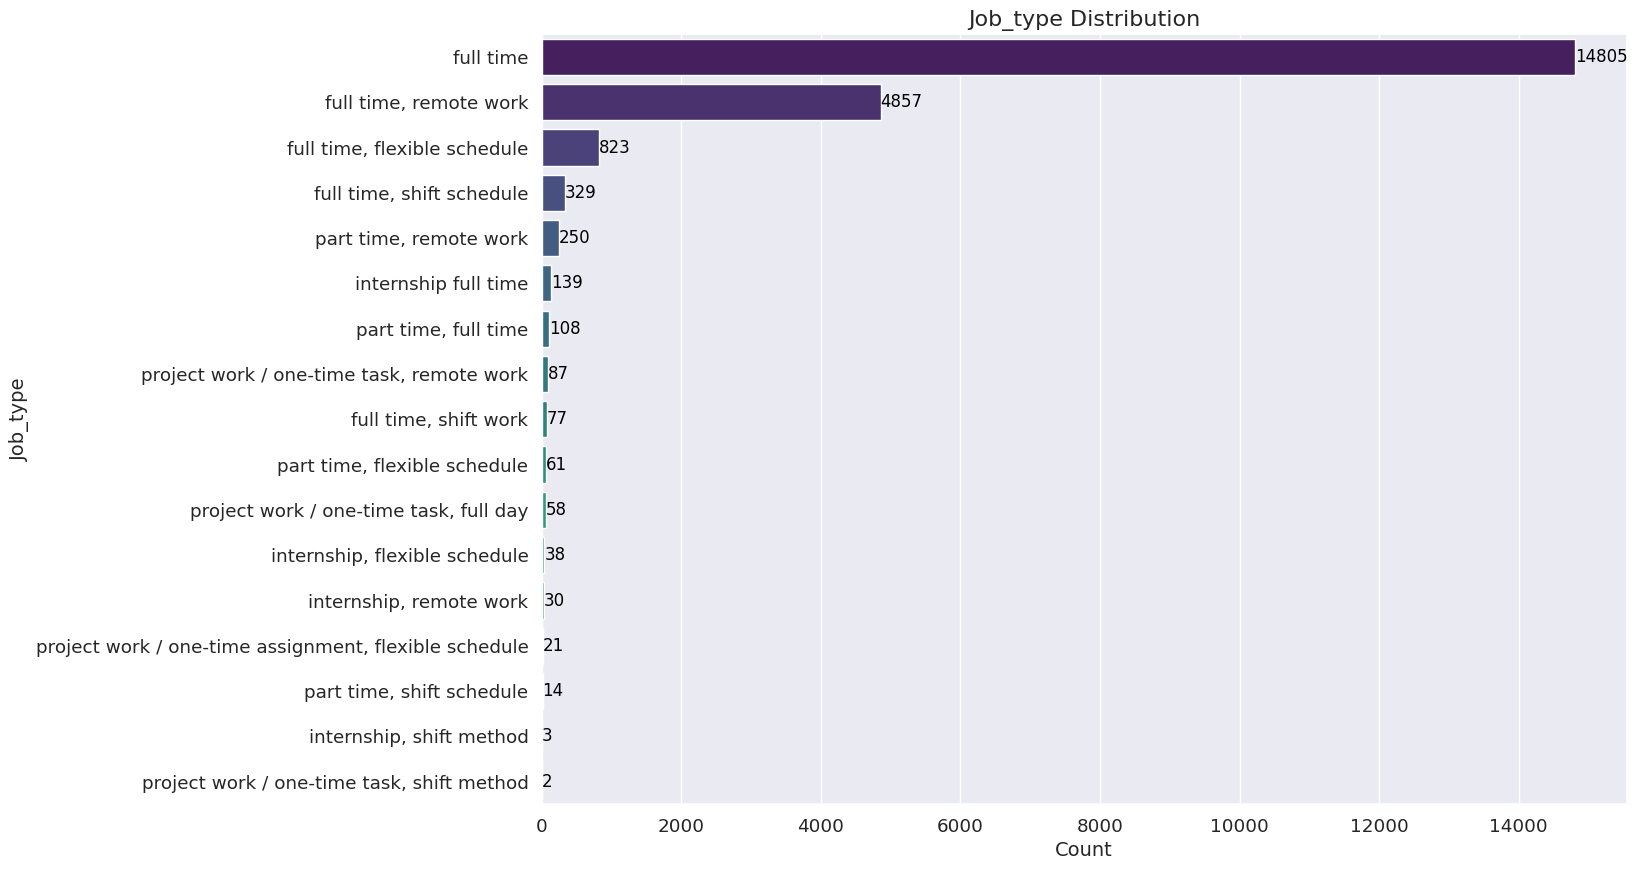

In [25]:
 # Job type distribution
plot_column_distribution(job_type_experience_min_max_salary_features_selected_df, 'job_type')

# key_skills - skill_encoded_df

Our skills variable contains a list of skills. To encode the key_skills column with only unique skills, we need to create a list of unique skills first. Then, we can encode the key_skills column based on this list.

ATTENTION! WE GOT TO FIGURE OUT A WAY TO EFFICIENTLY ENCODE SKILLS, AND DESCRIPTION, ONE HOT ENCODING DOESN'T DO IT, TOO MANY FEATURES ARE EXTRACTED FOR SKILLS, EXCEPT WE CAN COLLECT ALL SKILLS, DEFINE THEM UNIQUELY, CONVERT THEM TO ENGLISH, THEN MAYBE YES. AT THIS POINT I'M THINKING EMBEDDINGS, BUT I THINK ITS BEST TO UNIQUELY IDENTIFY ALL SKILLS, AND ONE HOT ENCODE.

In [26]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_skills_wordcloud(df, skills_column='key_skills', max_words=200, width=800, height=400):
    """
    Generate a word cloud for the unique skills in the specified column of the DataFrame.
    
    Args:
    df (pd.DataFrame): The DataFrame containing the skills column.
    skills_column (str): The name of the column containing the skills data.
    max_words (int): The maximum number of words to display in the word cloud.
    width (int): The width of the word cloud image.
    height (int): The height of the word cloud image.

    Returns:
    None
    """
    
    # Get the unique skills
    unique_skills = df[skills_column].explode().drop_duplicates().dropna().tolist()
    
    # print("Unique skills:", unique_skills)

    # Join the unique skills into a single string
    skills_text = ', '.join(unique_skills)
    
    # print("Skills text:", skills_text)

    # # Generate the word cloud
    wordcloud = WordCloud(max_words=max_words, width=width, height=height, background_color='white').generate(skills_text)

    # Display the word cloud
    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()


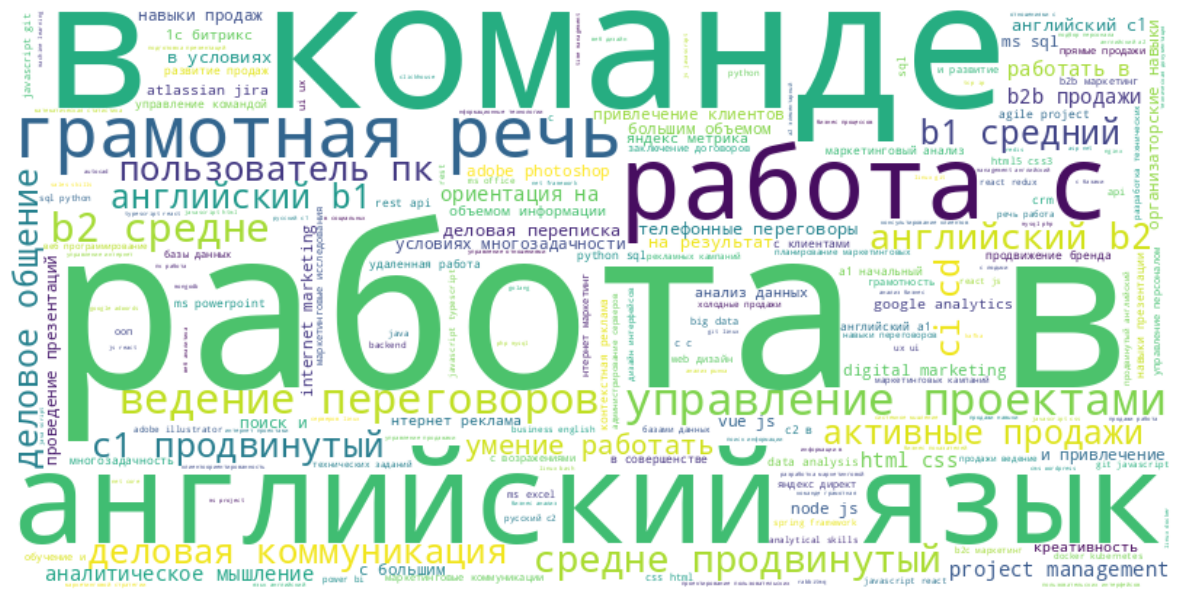

In [27]:
plot_skills_wordcloud(job_type_experience_min_max_salary_features_selected_df)


In [29]:
from sklearn.preprocessing import MultiLabelBinarizer

def encode_skills_dataframe(df, skills_column='key_skills'):
    """
    Encode the skills column of a DataFrame using MultiLabelBinarizer.
    
    Args:
    df (pd.DataFrame): The DataFrame containing the skills column.
    skills_column (str): The name of the column containing the skills data.

    Returns:
    pd.DataFrame: A new DataFrame with the encoded skills columns.
    """
    
    # Get the unique skills
    unique_skills = df[skills_column].explode().drop_duplicates().dropna().tolist()

    # Create an instance of MultiLabelBinarizer and fit it with the unique_skills
    mlb = MultiLabelBinarizer(classes=unique_skills)

    # Define a function that splits the skills string into a list of skills
    def split_skills(skills_str):
        return skills_str.split(',') if isinstance(skills_str, str) else []

    # Apply the split_skills function to the key_skills column
    df[skills_column] = df[skills_column].apply(split_skills)

    # Transform the key_skills column using the mlb instance
    encoded_skills = mlb.fit_transform(df[skills_column])

    # Create a DataFrame from the encoded skills array with the unique skill names as column names
    encoded_skills_df = pd.DataFrame(encoded_skills, columns=mlb.classes_, index=df.index)

    # Concatenate the encoded skills DataFrame with the original DataFrame
    encoded_df = pd.concat([df, encoded_skills_df], axis=1)

    # Drop the original key_skills column
    encoded_df.drop(skills_column, axis=1, inplace=True)

    return encoded_df


In [32]:
skill_encoded_df = encode_skills_dataframe(job_type_experience_min_max_salary_features_selected_df)


In [33]:
skill_encoded_df[:10]

,title,job_type,description,location,company,min_salary_usd,max_salary_usd,min_experience,max_experience,ms excel,...,продажа запчастей иностранной спецтехники,арабский язык,арабский — c1 — продвинутый,региональный представитель,сделки длительного цикла,walmart,португальский язык,португальский — b2 — средне-продвинутый,чат поддержки,письменная грамотность
0,prompt engineer/analyst,full time,future is coming… are you ready to be at the f...,"минск, академия наук, парк челюскинцев, тракто...",вебби технолоджис,NaN,NaN,1.0,3.0,0,...,0,0,0,0,0,0,0,0,0,0
1,technical lead full stack javascript developer...,full time,sam solutions is an international it-services ...,NaN,sam solutions самсолюшнс,NaN,NaN,6.0,NaN,0,...,0,0,0,0,0,0,0,0,0,0
2,junior qa engineer (manual),full time,lightspeed develops unified pos-systems which ...,"тбилиси, улица жиули шартава, 33",lightspeed,2000.000000,2200.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,senior qa engineer (remote),full time,the problem we're solving: truv empowers finan...,NaN,truv inc.,4000.000000,6000.0,6.0,NaN,0,...,0,0,0,0,0,0,0,0,0,0
4,junior qa engineer (manual),full time,lightspeed develops unified pos-systems which ...,NaN,lightspeed,2000.000000,2200.0,1.0,3.0,0,...,0,0,0,0,0,0,0,0,0,0
5,cloud engineer (devops or site reliability eng...,full time,full job description we are looking for a tale...,NaN,хлебушкин николай валерьевич,5000.000000,8000.0,6.0,NaN,0,...,0,0,0,0,0,0,0,0,0,0
6,software engineer / senior python developer,full time,position: senior python developer location: re...,NaN,сигматрикс,NaN,7686.7,6.0,NaN,0,...,0,0,0,0,0,0,0,0,0,0
7,devops release engineer,full time,сегодня на рынке мы одини из ведущих экспертов...,NaN,райдер софт,3500.000000,4500.0,1.0,3.0,0,...,0,0,0,0,0,0,0,0,0,0
8,senior qa engineer (remote),full time,the problem we're solving: truv empowers finan...,NaN,truv inc.,4000.000000,6000.0,6.0,NaN,0,...,0,0,0,0,0,0,0,0,0,0
9,team lead / senior software engineer (python),"full time, remote work",привет! smmplanner занимается разработкой и п...,NaN,smmplanner,2857.142857,NaN,6.0,NaN,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
skill_encoded_df.to_csv('skill_encoded_df.csv', index=False)

# Todo! High dimensionality due to this encoding, we'll try embeddings with Word2Vec

Using embeddings to represent key_skills could significantly reduce the dimensionality of the dataset and capture relationships between the skills, which might improve the performance of your recommendation model. You can use pre-trained word embeddings or learn skill-specific embeddings from the data using techniques like Word2Vec or GloVe.

In [ ]:
#Embeddings


# Job Description - description_skill_encoded_df

To achieve our goal of creating a recommendation model that can help candidates determine if they qualify for the job titles, we can use natural language processing techniques to analyze and represent the information contained in the job descriptions.

One possible approach is to use the Term Frequency-Inverse Document Frequency (TF-IDF) to transform the job descriptions into a numeric representation. Then, you can use a similarity measure (such as cosine similarity) to compare the candidate's skills and qualifications with the job descriptions, and recommend the jobs with the highest similarity scores.

Here's a high-level overview of the steps:

1. Preprocess the job descriptions: Clean the text data (e.g., remove special characters, convert to lowercase, remove stop words, etc.).

2.  Apply TF-IDF transformation: Use the TfidfVectorizer from the sklearn.feature_extraction.text module to transform the preprocessed job descriptions into a numeric representation.

3. Calculate similarity scores: Given a candidate's skills and qualifications (also preprocessed and transformed using the same TF-IDF vectorizer), calculate the cosine similarity between the candidate's vector and the job description vectors.

4. Recommend jobs: Based on the similarity scores, recommend the jobs with the highest similarity scores.

In [44]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

# Preprocessing function for job descriptions
def preprocess_description(description):
    if not isinstance(description, str):
        return ''
    
    # Remove special characters and digits
    description = re.sub(r'[^a-zA-Zа-яА-ЯёЁ\s]', ' ', description)
    
    # Convert to lowercase
    description = description.lower()
    
    # Tokenize and remove stop words
    tokens = nltk.word_tokenize(description)
    tokens = [token for token in tokens if token not in stopwords.words('russian')]

    # Join the tokens back into a single string
    preprocessed_description = ' '.join(tokens)
    
    return preprocessed_description

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [39]:
#Copy encoded data to new df
preprocessed_description_skill_encoded_df = skill_encoded_df.copy()

In [41]:
# Preprocess the job descriptions single processor
preprocessed_description_skill_encoded_df['description'] = preprocessed_description_skill_encoded_df['description'].apply(preprocess_description)

In [70]:
preprocessed_description_skill_encoded_df

,title,job_type,description,location,company,min_salary_usd,max_salary_usd,min_experience,max_experience,ms excel,...,продажа запчастей иностранной спецтехники,арабский язык,арабский — c1 — продвинутый,региональный представитель,сделки длительного цикла,walmart,португальский язык,португальский — b2 — средне-продвинутый,чат поддержки,письменная грамотность
0,prompt engineer/analyst,full time,future is coming are you ready to be at the fo...,"минск, академия наук, парк челюскинцев, тракто...",вебби технолоджис,NaN,NaN,1.0,3.0,0,...,0,0,0,0,0,0,0,0,0,0
1,technical lead full stack javascript developer...,full time,sam solutions is an international it services ...,NaN,sam solutions самсолюшнс,NaN,NaN,6.0,NaN,0,...,0,0,0,0,0,0,0,0,0,0
2,junior qa engineer (manual),full time,lightspeed develops unified pos systems which ...,"тбилиси, улица жиули шартава, 33",lightspeed,2000.0,2200.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,senior qa engineer (remote),full time,the problem we re solving truv empowers financ...,NaN,truv inc.,4000.0,6000.0,6.0,NaN,0,...,0,0,0,0,0,0,0,0,0,0
4,junior qa engineer (manual),full time,lightspeed develops unified pos systems which ...,NaN,lightspeed,2000.0,2200.0,1.0,3.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19866,менеджер по продажам/sales manager,full time,обязанности отвечает развитие россии пяти стра...,"ташкент, улица афросиаб, 8а",нептун логистикс,500.0,800.0,3.0,6.0,0,...,0,0,0,0,0,0,0,0,0,0
19867,sales manager,full time,обязанности холодные звонки формирование базы ...,NaN,at multimodal logistics,300.0,3000.0,1.0,3.0,0,...,0,0,0,0,0,0,0,0,0,0
19868,it sales manager (crypto),"full time, remote work",icoda это digital агентство которое занимается...,минск,нелюбин с. д.,1500.0,5000.0,1.0,3.0,0,...,0,0,0,0,0,0,0,0,0,0
19869,sales manager b2b (gaming/gambling/finance),full time,международная компания которая включает команд...,"минск, площадь якуба коласа, улица веры хоруже...",диалмедиа / buzzguru,NaN,NaN,1.0,3.0,0,...,0,0,0,0,0,0,0,0,0,0


# Clean up the data

NaN count in 'description' column: 0
NaN count in 'min_salary_usd' column: 13187
NaN count in 'title' column: 25
NaN count in 'job_type' column: 15
NaN count in 'location' column: 10777
NaN count in 'company' column: 57
NaN count in 'max_salary_usd' column: 15239
NaN count in 'min_experience' column: 15
NaN count in 'max_experience' column: 1090


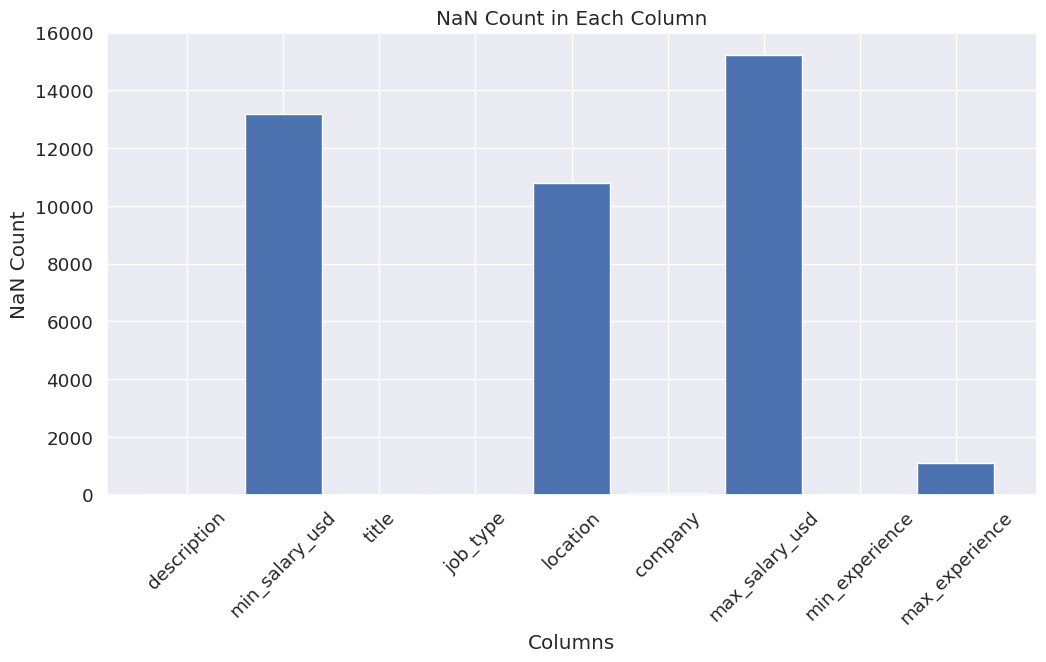

In [72]:
description_nan_count = preprocessed_description_skill_encoded_df['description'].isna().sum()
print("NaN count in 'description' column:", description_nan_count)

min_salary_nan_count = preprocessed_description_skill_encoded_df['min_salary_usd'].isna().sum()
print("NaN count in 'min_salary_usd' column:", min_salary_nan_count)

title_nan_count = preprocessed_description_skill_encoded_df['title'].isna().sum()
print("NaN count in 'title' column:", title_nan_count)

job_type_nan_count = preprocessed_description_skill_encoded_df['job_type'].isna().sum()
print("NaN count in 'job_type' column:", job_type_nan_count)

location_nan_count = preprocessed_description_skill_encoded_df['location'].isna().sum()
print("NaN count in 'location' column:", location_nan_count)

company_nan_count = preprocessed_description_skill_encoded_df['company'].isna().sum()
print("NaN count in 'company' column:", company_nan_count)

max_salary_nan_count = preprocessed_description_skill_encoded_df['max_salary_usd'].isna().sum()
print("NaN count in 'max_salary_usd' column:", max_salary_nan_count)

min_experience_nan_count = preprocessed_description_skill_encoded_df['min_experience'].isna().sum()
print("NaN count in 'min_experience' column:", min_experience_nan_count)

max_experience_nan_count = preprocessed_description_skill_encoded_df['max_experience'].isna().sum()
print("NaN count in 'max_experience' column:", max_experience_nan_count)

# Store the column names and their corresponding NaN counts
columns = ['description', 'min_salary_usd', 'title', 'job_type', 'location', 'company', 'max_salary_usd', 'min_experience', 'max_experience']
nan_counts = [description_nan_count, min_salary_nan_count, title_nan_count, job_type_nan_count, location_nan_count, company_nan_count, max_salary_nan_count, min_experience_nan_count, max_experience_nan_count]

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(columns, nan_counts)
plt.xlabel('Columns')
plt.ylabel('NaN Count')
plt.title('NaN Count in Each Column')
plt.xticks(rotation=45)
plt.show()


Let's clean up NaNs, etc

In [55]:
# Create a new dataframe with cleaned data
cleaned_preprocessed_description_skill_encoded_df = preprocessed_description_skill_encoded_df.copy()

# Fill NaN values in min_experience and max_experience columns with 0
cleaned_preprocessed_description_skill_encoded_df['min_experience'].fillna(0, inplace=True)
cleaned_preprocessed_description_skill_encoded_df['max_experience'].fillna(0, inplace=True)

# Remove rows with NaN values in min_salary_usd, max_salary_usd, title, and description columns
cleaned_preprocessed_description_skill_encoded_df.dropna(subset=['min_salary_usd', 'max_salary_usd', 'title', 'description'], inplace=True)

# Reset the index after removing rows
cleaned_preprocessed_description_skill_encoded_df.reset_index(drop=True, inplace=True)


In [56]:
cleaned_preprocessed_description_skill_encoded_df.to_csv("cleaned_preprocessed_description_skill_encoded_df.csv", index=False)

The tfidf_matrix has a numeric representation of each job description in our dataset. Each row in the matrix corresponds to a job description, and the columns represent the features (words or phrases) extracted by the TfidfVectorizer. This numeric representation captures the importance of words and phrases in each job description relative to the entire dataset.

We can use this matrix as input features (X) when training a model to predict job titles or any other relevant target variable. The model will learn to associate the patterns in the job descriptions (as represented by the numeric values in the tfidf_matrix) with the corresponding job titles or target values, which can then be used for making recommendations or predictions for new job descriptions.

In [57]:
# Import the necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object with the desired settings
# max_df: maximum document frequency for the given word; ignore words that appear in more than 80% of the documents
# max_features: maximum number of features (unique words) to consider, sorted by term frequency across the corpus
# min_df: minimum document frequency for the given word; ignore words that appear in less than 20% of the documents
# use_idf: use Inverse Document Frequency, a weighting scheme that assigns lower weights to words that appear more frequently across documents
# ngram_range: consider unigrams, bigrams, and trigrams (1- to 3-word phrases)
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000, min_df=0.02, stop_words='english', use_idf=True, ngram_range=(1, 3))

# Fit the vectorizer on the 'description' column and transform the preprocessed job descriptions
tfidf_matrix = tfidf_vectorizer.fit_transform(cleaned_preprocessed_description_skill_encoded_df['description'])


# Job description to predict job title 

In [64]:
cleaned_preprocessed_description_skill_encoded_df

,title,job_type,description,location,company,min_salary_usd,max_salary_usd,min_experience,max_experience,ms excel,...,продажа запчастей иностранной спецтехники,арабский язык,арабский — c1 — продвинутый,региональный представитель,сделки длительного цикла,walmart,португальский язык,португальский — b2 — средне-продвинутый,чат поддержки,письменная грамотность
0,junior qa engineer (manual),full time,lightspeed develops unified pos systems which ...,"тбилиси, улица жиули шартава, 33",lightspeed,2000.000000,2200.000000,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,senior qa engineer (remote),full time,the problem we re solving truv empowers financ...,NaN,truv inc.,4000.000000,6000.000000,6.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,junior qa engineer (manual),full time,lightspeed develops unified pos systems which ...,NaN,lightspeed,2000.000000,2200.000000,1.0,3.0,0,...,0,0,0,0,0,0,0,0,0,0
3,cloud engineer (devops or site reliability eng...,full time,full job description we are looking for a tale...,NaN,хлебушкин николай валерьевич,5000.000000,8000.000000,6.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,devops release engineer,full time,сегодня рынке одини ведущих экспертов организа...,NaN,райдер софт,3500.000000,4500.000000,1.0,3.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3708,менеджер по продажам авиазапчастей,full time,,NaN,NaN,1317.720000,3294.300000,3.0,6.0,0,...,0,0,0,0,0,0,0,0,0,0
3709,sales manager,full time,молодая амбициозная успешная команда компания ...,"минск, немига, зыбицкая улица, 6",охс сстемс,11.428571,71.428571,1.0,3.0,0,...,0,0,0,0,0,0,0,0,0,0
3710,менеджер по продажам/sales manager,full time,обязанности отвечает развитие россии пяти стра...,"ташкент, улица афросиаб, 8а",нептун логистикс,500.000000,800.000000,3.0,6.0,0,...,0,0,0,0,0,0,0,0,0,0
3711,sales manager,full time,обязанности холодные звонки формирование базы ...,NaN,at multimodal logistics,300.000000,3000.000000,1.0,3.0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
# Prepare the target variable (y):
y = cleaned_preprocessed_description_skill_encoded_df['title']

In [66]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, y, test_size=0.2, random_state=42)

We'll choose a suitable machine learning model. For text classification tasks, Let's start with Logistic Regression, Multinomial Naive Bayes, and Support Vector Machines. 

In [67]:
from sklearn.linear_model import LogisticRegression

lg_model = LogisticRegression(max_iter=1000)

In [68]:
# Train the model using the training set
lg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Evaluate the performance of the model using the testing set

In [69]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = lg_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.11709286675639301
Classification Report:
                                                                                                     precision    recall  f1-score   support

                      account manager / менеджер по работе с клиентами (english / английский язык)       0.00      0.00      0.00         1
                                                                                account manager it       0.00      0.00      0.00         1
                                                       administrator (dubai)/администратор (dubai)       0.00      0.00      0.00         1
                                                                                           analyst       0.00      0.00      0.00         1
                                                                                  analyst (remote)       0.50      1.00      0.67         1
                                                                    android разработчик (удалённо)       

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1